<a href="https://colab.research.google.com/github/sohyun329/ML_Study/blob/main/LightGBM_%EC%9D%B4%EC%83%81%EA%B1%B0%EB%9E%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LightGBM
- 최신 부스팅 모델
- 장점 :
  - XGBoost보다도 빠르고 높은 정확도를 보여주는 경우가 많다.
  - 예측에 영향을 미친 변수의 중요도를 확인할 수 있다.
  - 변수 종류가 많고 데이터가 클수록 상대적으로 뛰어난 성능을 보여준다.
- 단점 :
  - 복잡한 모델인 만큼 해석에 어려움이 있다.
  - 하이퍼파라미터 튜닝이 까다롭다.
- 유용한 곳
  - 종속변수가 연속형 데이터인 경우든 범주형 데이터인 경우든 모두 사용할 수 있다.
  - 이미지나 자연어가 아닌 표로 정리된 데이터라면 거의 모든 상황에서 활용 가능하다.

## 1. 데이터 불러오기, 데이터 확인하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [4]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [5]:
round(data.describe(),2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
std,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00


## 2. 전처리 : 데이터 클리닝

In [6]:
data.drop(['first','last','street','city','state','zip','trans_num','unix_time','job','merchant'],axis=1,inplace=True)

In [7]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


## 3. 전처리 : 피처 엔지니어링
### 3-1. 결제금액
- Z점수(Z-Score : 표준값) : 평균과 표준편차를 이용하여 특정값이 정규분포 범위에서 어느 수준에 위치하는지를 나타낸다.

In [9]:
print(data['amt'].dtype)

float64


In [10]:
amt_info = data.groupby('cc_num')['amt'].agg(['mean', 'std']).reset_index()

In [11]:
amt_info.head()

,cc_num,mean,std
0,60416207185,59.257796,142.869746
1,60422928733,65.483159,92.042844
2,60423098130,96.376084,1000.693872
3,60427851591,107.487550,131.014534
4,60487002085,64.096925,153.207660


In [12]:
data = data.merge(amt_info, on='cc_num', how='left')

In [13]:
data['amt_z_score'] = (data['amt']-data['mean'])/data['std']

In [14]:
data[['amt','mean','std','amt_z_score']].head()

,amt,mean,std,amt_z_score
0,4.97,89.408743,127.530101,-0.662108
1,107.23,56.078113,159.201852,0.321302
2,220.11,69.924272,116.688602,1.287064
3,45.00,80.090040,280.077880,-0.125287
4,41.96,95.341146,94.322842,-0.565941


In [15]:
data.drop(['mean','std'],axis=1,inplace=True)

### 3-2. 범주

In [16]:
category_info = data.groupby(['cc_num','category'])['amt'].agg(['mean','std']).reset_index()

In [17]:
data = data.merge(category_info, on=['cc_num','category'],how='left')

In [18]:
data['cat_z_score'] = (data['amt']-data['mean'])/data['std']
data.drop(['mean','std'],axis=1, inplace=True)

### 3-3 거리

In [19]:
import geopy.distance

In [20]:
data['merch_coord'] = pd.Series(zip(data['merch_lat'],data['merch_long'])) # 위도, 경도 합치기
data['cust_coord'] = pd.Series(zip(data['lat'],data['long']))

In [21]:
#data['distance'] = data.apply(lambda x:geopy.distance.distance(x['merch_coord'],x['cust_coord']).km, axis=1)

In [22]:
# 코드 실행 시간 확인
import time

start_time = time.time()
data['distance'] = data.apply(lambda x:geopy.distance.distance(x['merch_coord'],x['cust_coord']).km, axis=1)
end_time = time.time()
print(end_time - start_time)

440.6839768886566


In [23]:
distance_info = data.groupby('cc_num')['distance'].agg(['mean','std']).reset_index()
data = data.merge(distance_info, on='cc_num', how='left')
data['distance_z_score'] = (data['distance']-data['mean'])/data['std']
data.drop(['mean','std'],axis=1,inplace=True)
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance,distance_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821,0.030974
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618,-1.475224
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)",108.102912,1.160572
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.685115,0.818063
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.702395,0.064037


### 3-4. 나이 구하기

In [24]:
data['age'] = 2021 - pd.to_datetime(data['dob']).dt.year

In [25]:
data.drop(['cc_num','lat','long','merch_lat','merch_long','dob','merch_coord','cust_coord'],axis=1, inplace=True)
data.head()

,trans_date_trans_time,category,amt,gender,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,0,-0.662108,-0.688297,78.773821,0.030974,33
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,0,0.321302,0.317631,30.216618,-1.475224,43
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,0,1.287064,2.872509,108.102912,1.160572,59
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,0,-0.125287,-1.050197,95.685115,0.818063,54
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,0,-0.565941,1.312866,77.702395,0.064037,35


### 3-5. 새 변수 만들기

In [26]:
data = pd.get_dummies(data, columns=['category','gender'],drop_first=True)

In [27]:
data.set_index('trans_date_trans_time',inplace=True)
data.head()

,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,4.97,3495,0,-0.662108,-0.688297,78.773821,0.030974,33,False,False,...,False,False,False,True,False,False,False,False,False,False
2019-01-01 00:00:44,107.23,149,0,0.321302,0.317631,30.216618,-1.475224,43,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-01 00:00:51,220.11,4154,0,1.287064,2.872509,108.102912,1.160572,59,False,False,...,False,False,False,False,False,False,False,False,False,True
2019-01-01 00:01:16,45.00,1939,0,-0.125287,-1.050197,95.685115,0.818063,54,False,True,...,False,False,False,False,False,False,False,False,False,True
2019-01-01 00:03:06,41.96,99,0,-0.565941,1.312866,77.702395,0.064037,35,False,False,...,False,False,False,False,True,False,False,False,False,True


## 4. 모델링 및 평가

In [28]:
train = data[data.index < '2020-07-01']
test = data[data.index >= '2020-07-01']

In [29]:
len(test)/len(data)

0.2837738623640543

In [30]:
X_train = train.drop('is_fraud',axis=1)
X_test = test.drop('is_fraud',axis=1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [31]:
import lightgbm as lgb

model_1 = lgb.LGBMClassifier(random_state=100)
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

accuracy_score(y_test, pred_1)

0.9970760623291437

In [33]:
print(confusion_matrix(y_test, pred_1))

[[522933    716]
 [   821   1191]]


In [34]:
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.62      0.59      0.61      2012

    accuracy                           1.00    525661
   macro avg       0.81      0.80      0.80    525661
weighted avg       1.00      1.00      1.00    525661



In [35]:
proba_1 = model_1.predict_proba(X_test)

In [36]:
proba_1

array([[9.99968780e-01, 3.12200159e-05],
       [9.99973950e-01, 2.60503888e-05],
       [9.99960796e-01, 3.92036962e-05],
       ...,
       [9.99964825e-01, 3.51746051e-05],
       [9.99844073e-01, 1.55926950e-04],
       [9.99945924e-01, 5.40758390e-05]])

In [37]:
proba_1[:,1]

array([3.12200159e-05, 2.60503888e-05, 3.92036962e-05, ...,
       3.51746051e-05, 1.55926950e-04, 5.40758390e-05])

In [38]:
proba_1 = proba_1[:,1]
proba_int1 = (proba_1 > 0.2).astype('int')
proba_int2 = (proba_1 > 0.8).astype('int')

In [39]:
print(confusion_matrix(y_test, proba_int1))

[[522105   1544]
 [   598   1414]]


In [40]:
print(classification_report(y_test, proba_int1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.48      0.70      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.74      0.85      0.78    525661
weighted avg       1.00      1.00      1.00    525661



In [41]:
print(confusion_matrix(y_test, proba_int2))

[[523183    466]
 [   958   1054]]


In [42]:
print(classification_report(y_test, proba_int2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.69      0.52      0.60      2012

    accuracy                           1.00    525661
   macro avg       0.85      0.76      0.80    525661
weighted avg       1.00      1.00      1.00    525661



### ROC곡선과 AUC
- 이진분류 모델을 평가하는 방법으로, 기준점에 영향을 받지 않기 때문에 여러 모델을 비교할 때 요긴하게 사용
- AUC는 ROC 곡선의 아래 면적을 의미, 0.5~1 사이의 값을 지니며 높을수록 좋은 모델
- TPR : 실제 1인것 중 얼마만큼 제대로(1로) 예측되었는가
- FPR : 실제 0인것 중 얼마만큼 1로 잘못 예측 되었는가

In [43]:
roc_auc_score(y_test, proba_1)

0.9366009328741358

## 5. 하이퍼파라미터 튜닝 : 랜덤 그리드 서치

- L1 정규화는 피처 셀렉션의 역할을 해주기 때문에 불필요한 변수들을 자동으로 학습에서 배제한다.
- 회귀 분석은 모든 피처를 다 사용하기 때문에 피처 셀렉션을 지원하는 라쏘 회귀를 사용하거나, 포워드 셀렉션, 백워드 제거, 재귀적 피처 제거와 같은 방법을 사용할 수 있다.
- L1 정규화 & L2 정규화 : 매개변수에 패널티를 가해서 그 영향력을 감소시키는 방법으로, 오버피팅을 방지하는 목적으로 사용

In [44]:
from sklearn.model_selection import RandomizedSearchCV
import time

params = {
    'n_estimators':[100,500,1000],
    'learning_rate':[0.01,0.05,0.1,0.3],
    'lambda_l1':[0,10,20,30,50], # L1 정규화
    'lambda_l2':[0,10,20,30,50], # L2 정규화
    'max_depth':[5,10,15,20],
    'subsample':[0.6,0.8,1]
}

model_2 = lgb.LGBMClassifier(random_state=100)
rs = RandomizedSearchCV(model_2, param_distributions=params, n_iter=30, scoring='roc_auc', random_state=100, n_jobs=-1)

start = time.time()
rs.fit(X_train, y_train)
print(time.time()-start)

[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434
6246.625689744949


In [45]:
rs.best_params_

{'subsample': 1,
 'n_estimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.05,
 'lambda_l2': 20,
 'lambda_l1': 0}

In [46]:
rs_proba = rs.predict_proba(X_test)
roc_auc_score(y_test, rs_proba[:,1])

[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


0.9953122884656392

In [47]:
rs_proba_int = (rs_proba[:,1]>0.2).astype('int')
print(confusion_matrix(y_test, rs_proba_int))

[[522519   1130]
 [   504   1508]]


In [48]:
print(classification_report(y_test, rs_proba_int))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.57      0.75      0.65      2012

    accuracy                           1.00    525661
   macro avg       0.79      0.87      0.82    525661
weighted avg       1.00      1.00      1.00    525661



## 6. LightGBM의 train( ) 함수 사용

In [49]:
train = data[data.index < '2020-01-01']
val = data[(data.index >= '2020-01-01') & (data.index < '2020-07-01')]
test = data[data.index >= '2020-07-01']

In [50]:
X_train = train.drop('is_fraud',axis=1)
X_val = val.drop('is_fraud',axis=1)
X_test = test.drop('is_fraud',axis=1)
y_train = train['is_fraud']
y_val = val['is_fraud']
y_test = test['is_fraud']

In [51]:
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)

In [52]:
params_set = rs.best_params_
params_set['metrics'] = 'auc'

In [53]:
params_set

{'subsample': 1,
 'n_estimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.05,
 'lambda_l2': 20,
 'lambda_l1': 0,
 'metrics': 'auc'}

In [57]:
# 모델 학습
model_3 = lgb.train(
    params_set,
    d_train,
    valid_sets=[d_val],
    num_boost_round=1000,  # 최대 1000번의 boosting iteration
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),  # 조기 중단
        lgb.log_evaluation(period=100)            # 100번마다 평가 결과 출력
    ]
)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.180981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 924850, number of used features: 21
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly sett

In [58]:
pred_3 = model_3.predict(X_test)

In [59]:
roc_auc_score(y_test, pred_3)

0.991352108964131

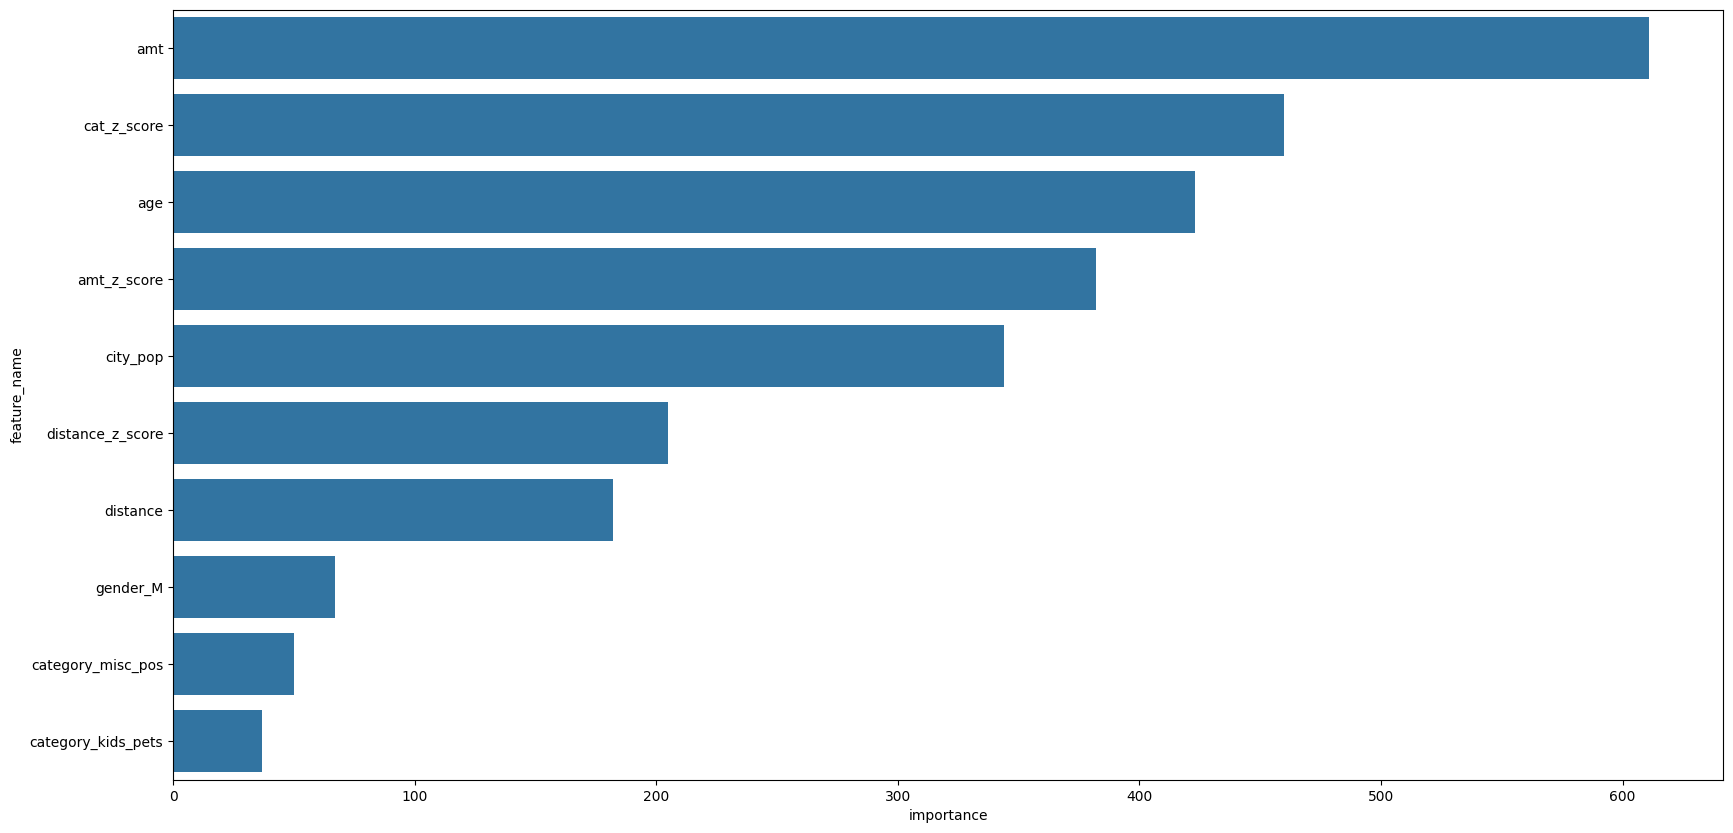

In [60]:
feature_imp = pd.DataFrame({'feature_name':X_train.columns, 'importance':model_1.feature_importances_}).sort_values('importance',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x="importance",y="feature_name",data=feature_imp.head(10))
plt.show()

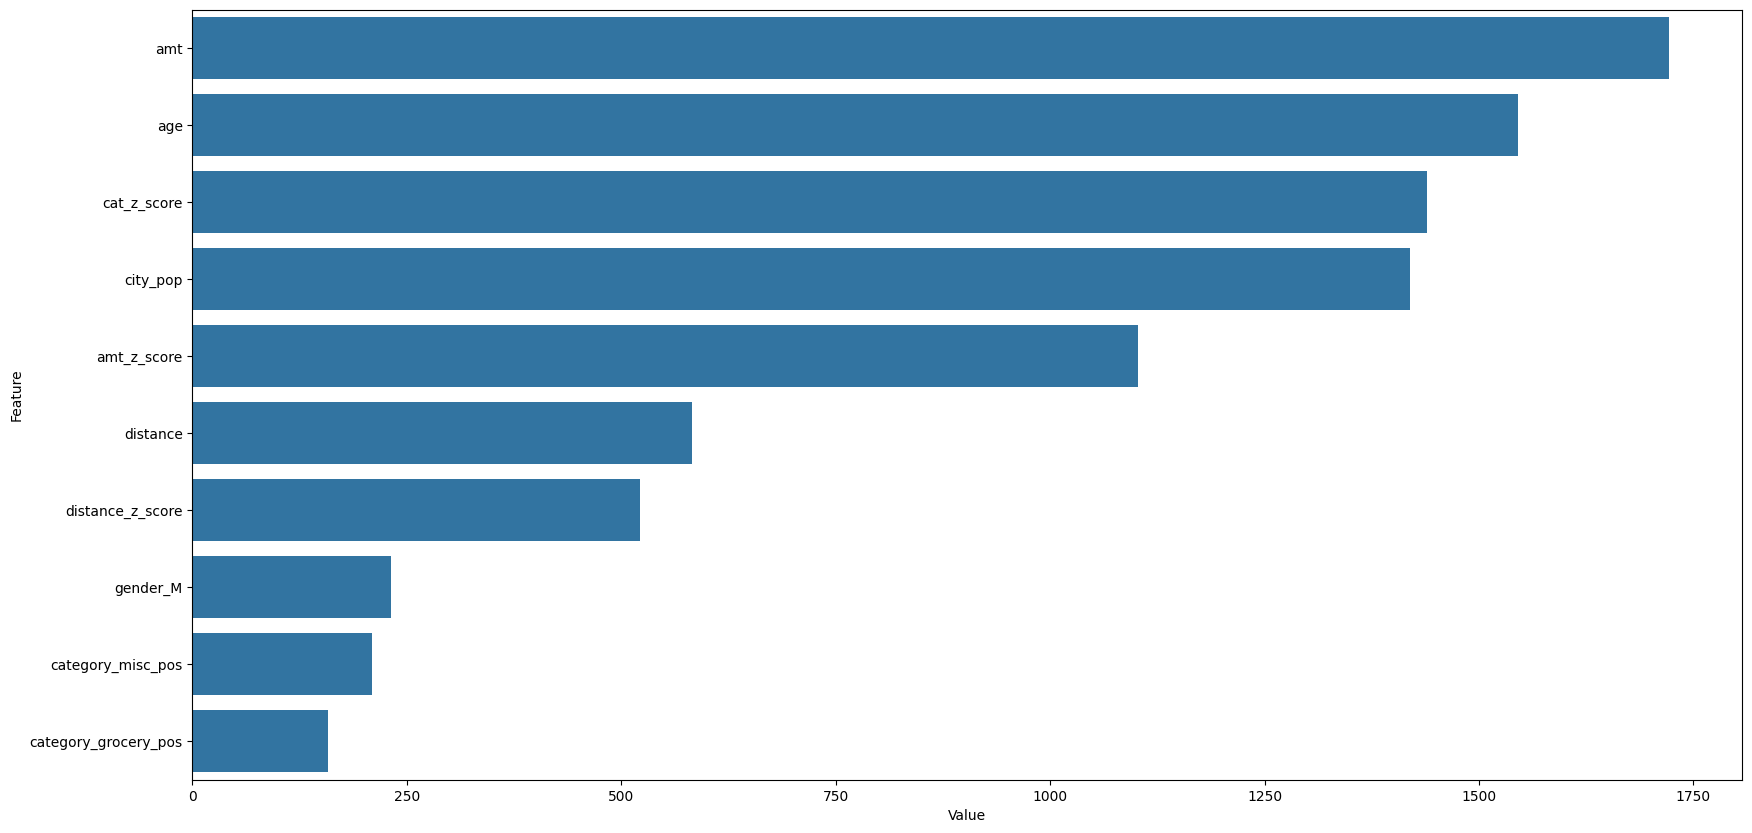

In [63]:
# feature 중요도를 내림차순으로 정렬
feature_imp_3 = pd.DataFrame(sorted(zip(model_3.feature_importance(), X_train.columns)), columns=['Value', 'Feature'])

# 내림차순 정렬 후 상위 10개의 중요도 선택
feature_imp_3 = feature_imp_3.sort_values(by="Value", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp_3.head(10))  # 상위 10개 시각화
plt.show()

## 7. LightGBM vs XGBoost
- 차이점 : '트리의 가지를 어떤 식으로 뻗는가'
- XGBoost : 균형 분할, 각 노드에서 같은 깊이를 형성하도록 한층 한층 밑으로
- LightGBM : 불균형 분할, 특정 노드에서 뻗어나가는 가지가 모델의 개선에 도움이 된다면 계속해서 그 가지에서 뻗기
- 속도 : XGBoost < LightGBM (CPU환경에서, GPU에선 XGBoost가 우세)
- 복잡성 : XGBoost < LightGBM
- 오버피팅 문제 : XGBoost < LightGBM (하이퍼파라미터 튜닝으로 어느정도 극복 가능)
- XGBoost 대비 LightGBM 장점
  - 빠른 학습 및 예측
  - 더 적은 메모리 사용
  - 데이터셋 자동 변환 및 최적 분할